# Tensorflow 2.0 - Basic Neural Network

This notebook covers off on the basics of creating neural networks with `keras`.

## General Topics

These are the main areas I took notes over beforing jumping into the actual neural nets

* What is a Neural Network
* Basics of the Math
* Backpropagation
* Layers in the Data Model

Then I moved to `keras` for the sections below and the model uses the `MNIST fashion` dataset

* Creating a Network
* Basic Data Preprocessing
* Building the Network
* Compile
* Evaluate
* Predict


## What is a Neural Network (NN for short)

### But first `keras`

Keras is a high-level nn api that runs untop of TF, CNTK, or Theano.  Ideal for fast experimentation.  It uses a good amount of abstraction to create simple sequence or functional models, but can be subclassed into custom models with different custom layers.  TF uses it directly with the `tf.keras`.

### Back to NNs

#### Basics of the Math

High-level, NNs are a summation of `weights`, `neurons`, and a `basis` term all wrapped up in an `activation` function. 

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Where the `activation` function applies a `squish-ification` to the output in the form of a `sigmoid` or `ReLU`.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid 

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

#### Backpropagation

This is the fun part with lots of interesting but mind melting math.  Basically, what *Backpropagation* is doing is starting with the output layer and computing a *loss/cost function*.  That function is measuring how bad the model performed.  This is typically the *mean squared error*, *mean absolute error*, or *hinge loss*.  The model will then calculate (using the chain rule) which weights should be adjusted to make the model suck a little less.  The actual calculation of how much to change each weight and by how much is based on *gradient descent*.  What *gradient descent* is doing is computing the gradient of the function and then based on whether to min/max the loss/cost function it takes a steps in the gradient direction for each weight to adjust the error.  

> "Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)


![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)

`Stochastic Gradient Descent` is the most common as it is costly to compute the whole gradient overall the training data.  Here are some others:

* Mini-batch gradient descent
* momentum
* nestrov accelerated gradient



## Creating a NN with Keras

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# using the MNIST fashtion dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape # 60,000 images all 28x28 pixels

(60000, 28, 28)

In [7]:
# looking at just one 
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

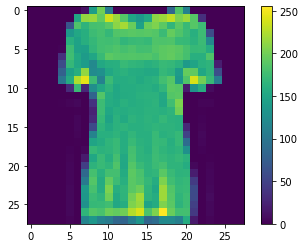

In [9]:
# Each of them are different classes and luckily they are all already encoded for us

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocessing

Simple preprocessing by dividing the values 255.0 to scale them all between 0 and 1.  Since TF is great with this math and we are using a scalar basically, TF operations on each 60,000 matrix of the 28, 28 grid (60000, 28,28) to divide each item by 255

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the model

This is so easy with keras for a simple sequence model.  Here is the description of the layers and what it is doing;

* Layer 1: Flatten.  This layer just takes the defined input shape and reshapes it to one long ass vector of 784.  So basically it is call tf.reshape(-1,1).  This layer ends up having 784 neurons that are fully connected to the next layer

* Layer 2: Dense.  This is the first `Dense` layer which means all the 784 neurons from the first is conencted to each neuron in this layer.  this will be defined with 128 neurons.  Why?  Because it is an arbituray number that can be tuned, and also that is what the tut has it in.

* Layer 3: Dense/Output.  This is the `Output` layer.  It is only configured with the 10 classes used in the prediction and its activition function is `softmax`.  `Softmax` is used on this layer to calculate the probability distribution of each class.  The mean for any neuron will be between 0 and 1, where 1 is 100% probability.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.4950 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3699 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3355 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 843us/step - loss: 0.3107 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 2s 877us/step - loss: 0.2916 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.2787 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.2674 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.2553 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.2461 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 2s 874us/st

In [18]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 799us/step - loss: 0.3442 - accuracy: 0.8781
Test accuracy: 0.8780999779701233


## Making Predictions

To make predictions use the `.predict()` method.


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0] # but you need to get the largest value of this array using the ng.argmax 

array([2.5868305e-06, 1.6353061e-07, 2.6034559e-07, 4.7072902e-07,
       8.1988077e-07, 2.1260677e-02, 1.2080448e-05, 1.2562475e-01,
       4.0465417e-05, 8.5305774e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

Trouser Trouser


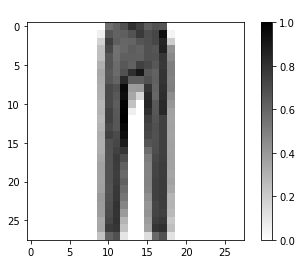

In [26]:
## Tying it all together with a function that addes some visualization to this

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    print(class_names[correct_label], predicted_class)
    
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Not so fast ...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)